In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import geopandas as gpd

## 1. Load the district data

In [2]:
district_locations_df = pd.read_csv("data/food_crises_cleaned.csv", usecols=["district", "centx", "centy"], 
                                    index_col="district").drop_duplicates()
locations_lst = district_locations_df.to_numpy()
district_names_lst = district_locations_df.index.to_numpy()

In [3]:
district_locations_df

,centx,centy
district,,
Bor,32.00486,6.465644
Jur River,28.02439,7.592506
Aweil North,26.72969,9.334756
Morobo,30.83354,3.737241
Magwi,32.21030,3.910535
...,...,...
Fashoda,31.84424,9.980295
Manyo,32.37020,11.130980
Melut,32.56855,10.380960


In [4]:
locations_lst

array([[32.00486 ,  6.465644],
       [28.02439 ,  7.592506],
       [26.72969 ,  9.334756],
       [30.83354 ,  3.737241],
       [32.2103  ,  3.910535],
       [31.46144 ,  3.894441],
       [33.13061 ,  4.027118],
       [30.34454 ,  4.252148],
       [28.54729 ,  5.124909],
       [29.06166 ,  5.099788],
       [30.85371 ,  4.277663],
       [29.68465 ,  5.096411],
       [28.20598 ,  5.309739],
       [33.68026 ,  4.563413],
       [33.4493  ,  4.357813],
       [32.5671  ,  4.372431],
       [31.48342 ,  4.717081],
       [30.20821 ,  5.213937],
       [30.68256 ,  5.307882],
       [33.46191 ,  5.306582],
       [32.67142 ,  5.249238],
       [34.60625 ,  5.175935],
       [27.8941  ,  5.460567],
       [31.32576 ,  5.662623],
       [30.03237 ,  5.917979],
       [31.22946 ,  6.150162],
       [27.73822 ,  6.471325],
       [30.48698 ,  6.395244],
       [27.14454 ,  6.043462],
       [27.29823 ,  7.284772],
       [33.5681  ,  6.396368],
       [29.20889 ,  6.200243],
       [

In [5]:
district_names_lst

array(['Bor', 'Jur River', 'Aweil North', 'Morobo', 'Magwi', 'Kajo Keji',
       'Ikotos', 'Yei', 'Yambio', 'Ibba', 'Lainya', 'Maridi', 'Anzara',
       'Kapoeta South', 'Budi', 'Torit', 'Juba', 'Mundri West',
       'Mundri East', 'Kapoeta North', 'Lafon', 'Kapoeta East', 'Ezo',
       'Terekeka', 'Mvolo', 'Awerial', 'Nagero', 'Yirol West', 'Tambura',
       'Wau', 'Pibor', 'Wulu', 'Rumbek East', 'Yirol East',
       'Rumbek Center', 'Twic East', 'Cueibet', 'Pochalla', 'Tonj South',
       'Rumbek North', 'Akobo', 'Panyijiar', 'Duk', 'Tonj East', 'Uror',
       'Ulang', 'Nasir', 'Leer', 'Mayendit', 'Maiwut', 'Ayod',
       'Tonj North', 'Aweil South', 'Koch', 'Aweil Center',
       'Gogrial East', 'Nyirol', 'Gogrial West', 'Aweil West', 'Twic',
       'Pigi', 'Mayom', 'Abiemnhom', 'Longchuk', 'Fangak', 'Maban',
       'Guit', 'Aweil East', 'Pariang', 'Rubkona', 'Panyikang', 'Raja',
       'Baliet', 'Fashoda', 'Manyo', 'Melut', 'Renk', 'Malakal'],
      dtype=object)

## 2. Load the external data

In [6]:
external_df = pd.read_csv(r"data/external_data/4_acleddata_2011-05-19-2023-09-28-South_Sudan.csv")
external_df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,SSD9467,19 September 2023,2023,1,Strategic developments,Strategic developments,Looting/property destruction,Murle Ethnic Militia (South Sudan),Pastoralists (South Sudan),4,...,Baidit,6.4294,31.5626,2,Radio Tamazuj,National,"Looting: On 19 September 2023, suspected Murle...",0,NaN,1695664793
1,SSD9466,18 September 2023,2023,1,Political violence,Battles,Armed clash,Anyuak Ethnic Militia (South Sudan),NaN,4,...,Pochalla,7.1881,34.0993,1,Eye Radio (South Sudan); Radio Tamazuj; Sudans...,National-International,"On 18 September 2023, heavy fighting was repor...",13,NaN,1695664793
2,SSD9465,17 September 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of South Sudan (2011-),NaN,1,...,Pochalla,7.1881,34.0993,1,Eye Radio (South Sudan); Radio Tamazuj; Sudans...,National-International,"On 17 September 2023, SSPDF soldiers attacked ...",1,NaN,1695664793
3,SSD9464,16 September 2023,2023,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (South Sudan),NaN,3,...,Akobo,7.7913,33.0051,2,Eye Radio (South Sudan),National,"On 16 September 2023, an armed group (alleged ...",4,NaN,1695664793
4,SSD9462,14 September 2023,2023,1,Political violence,Violence against civilians,Attack,Bor Clan Militia (South Sudan),Dinka Ethnic Militia (South Sudan); Pastoralis...,4,...,Kworijik,5.3403,31.8134,2,Eye Radio (South Sudan); Sudans Post,National,"On 14 September 2023, cattle raiders (alleged ...",2,NaN,1695055728


## 3. Categorise the external data to closest district coordinates

In [8]:
def closest_district(longitude, latitude):
    """Function to find the closest district given a latitude and longitude."""
    distances = np.linalg.norm(locations_lst - np.array([longitude, latitude]), axis=1)
    closest_idx = np.argmin(distances)
    return district_names_lst[closest_idx]

In [9]:
external_df["closest_district"] = external_df.apply(lambda row: closest_district(row['longitude'], row['latitude']), axis=1)
external_df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,closest_district
0,SSD9467,19 September 2023,2023,1,Strategic developments,Strategic developments,Looting/property destruction,Murle Ethnic Militia (South Sudan),Pastoralists (South Sudan),4,...,6.4294,31.5626,2,Radio Tamazuj,National,"Looting: On 19 September 2023, suspected Murle...",0,NaN,1695664793,Awerial
1,SSD9466,18 September 2023,2023,1,Political violence,Battles,Armed clash,Anyuak Ethnic Militia (South Sudan),NaN,4,...,7.1881,34.0993,1,Eye Radio (South Sudan); Radio Tamazuj; Sudans...,National-International,"On 18 September 2023, heavy fighting was repor...",13,NaN,1695664793,Pochalla
2,SSD9465,17 September 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of South Sudan (2011-),NaN,1,...,7.1881,34.0993,1,Eye Radio (South Sudan); Radio Tamazuj; Sudans...,National-International,"On 17 September 2023, SSPDF soldiers attacked ...",1,NaN,1695664793,Pochalla
3,SSD9464,16 September 2023,2023,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (South Sudan),NaN,3,...,7.7913,33.0051,2,Eye Radio (South Sudan),National,"On 16 September 2023, an armed group (alleged ...",4,NaN,1695664793,Akobo
4,SSD9462,14 September 2023,2023,1,Political violence,Violence against civilians,Attack,Bor Clan Militia (South Sudan),Dinka Ethnic Militia (South Sudan); Pastoralis...,4,...,5.3403,31.8134,2,Eye Radio (South Sudan); Sudans Post,National,"On 14 September 2023, cattle raiders (alleged ...",2,NaN,1695055728,Terekeka


## 4. Save categorised data

In [10]:
external_df.to_csv(r"data/external_data/4_acleddata_2011-05-19-2023-09-28-South_Sudan_with_district.csv", index=False)

## 5. Create geopandas

<AxesSubplot:>

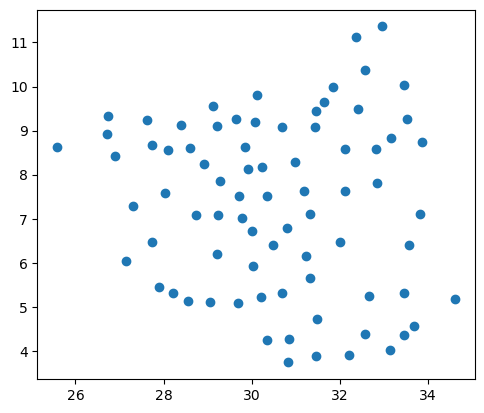

In [12]:
# create GeoPandas of district data
geom = gpd.points_from_xy(district_locations_df["centx"], district_locations_df["centy"])
geo_df = gpd.GeoDataFrame(district_locations_df, geometry=geom)
geo_df.plot()

<AxesSubplot:>

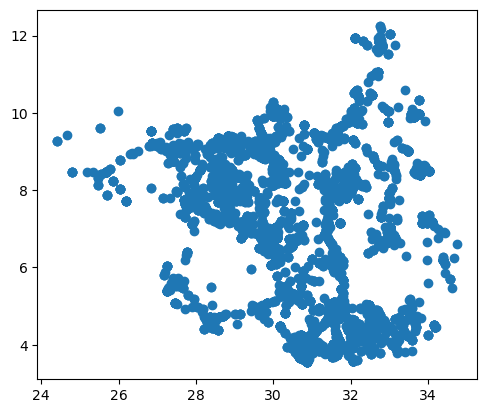

In [13]:
# create GeoPandas of external data
geo_external = gpd.points_from_xy(external_df["longitude"], external_df["latitude"])
geo_external_df = gpd.GeoDataFrame(external_df, geometry=geo_external)
geo_external_df.plot()